# Задание 1
## На основании датасета для каждого покупателя получите:
### •	предпочитаемый метод оплаты; 
### •	общие траты;
### •	количество денег, потраченных на дополнительные услуги и аксессуары. 

In [30]:
import pandas as pd
df = pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv", sep=",")
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [31]:
#   Фильтруем отмененные заказы
df_completed = df[df['Order Status'] == 'Completed'].copy()

#   Предпочитаемый метод оплаты
#   Oбщие траты;
#   Количество денег, потраченных на дополнительные услуги и аксессуары. 
groups = df_completed.groupby('Customer ID').agg(
    {
        "Total Price" : 'sum',
        "Add-on Total" : 'sum',
        "Payment Method" : lambda x: x.value_counts().idxmax(),
    }
)
groups.head()

,Total Price,Add-on Total,Payment Method
Customer ID,,,
1000,741.09,26.09,Paypal
1002,5020.60,60.16,Credit Card
1003,41.50,35.56,Cash
1004,83.00,65.78,Credit Card
1005,11779.11,75.33,Paypal


# Задание 2
## 1. На основании датасета получите доход:
### •	по каждому методу доставки, 
### •	по каждому типу продукта, 
### •	по дополнительным услугам за каждый месяц,
### •	по дополнительным услугам за каждый квартал. 
## 2. Отобразите полученные данные на графике.

In [32]:
# доход по каждому методу доставки
groups_delivery = df_completed.groupby('Shipping Type').agg({
    'Total Price' : 'sum'
})
groups_delivery

,Total Price
Shipping Type,
Expedited,8430385.58
Express,5632093.35
Overnight,5887722.52
Same Day,8292376.50
Standard,14387037.62


In [33]:
groups_products = df_completed.groupby('Product Type').agg({
    'Total Price' : 'sum'
})
groups_products

,Total Price
Product Type,
Headphones,2734651.00
Laptop,8365905.25
Smartphone,14407835.84
Smartwatch,9398591.23
Tablet,7722632.25


In [34]:
# по дополнительным услугам за каждый месяц,
df_completed['month'] = pd.to_datetime(df_completed['Purchase Date']).dt.to_period('M')
group_month = df_completed.groupby('month').agg({
    'Add-on Total': 'sum'
})
group_month

,Add-on Total
month,
2023-09,5337.61
2023-10,26153.21
2023-11,24453.33
2023-12,22750.23
2024-01,93254.95
2024-02,80253.72
2024-03,84713.93
2024-04,82294.06
2024-05,89374.18


In [35]:
df_completed['Quarter'] = pd.to_datetime(df_completed['Purchase Date']).dt.to_period('Q')
group_quarter = df_completed.groupby('Quarter').agg({
    'Add-on Total': 'sum'
})
group_quarter

,Add-on Total
Quarter,
2023Q3,5337.61
2023Q4,73356.77
2024Q1,258222.60
2024Q2,256316.84
2024Q3,242361.42


## Визуализация данных

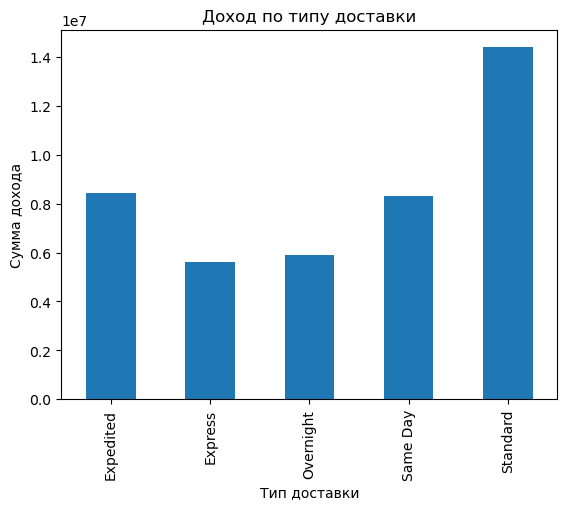

In [36]:
# Доход по типу доставки
import matplotlib.pyplot as plt
groups_delivery.plot(
    kind='bar',                     
    title='Доход по типу доставки', 
    ylabel='Сумма дохода', 
    xlabel='Тип доставки',
    legend=False
)
plt.show()

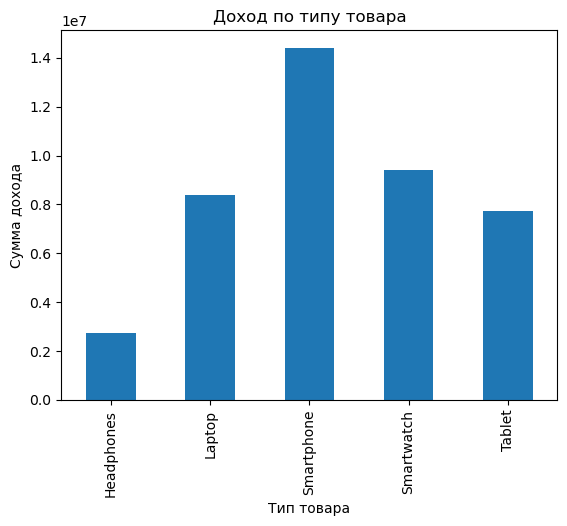

In [37]:
# Доход по типу товара
groups_products.plot(
    kind='bar',                     
    title='Доход по типу товара', 
    ylabel='Сумма дохода', 
    xlabel='Тип товара',
    legend=False
)
plt.show()

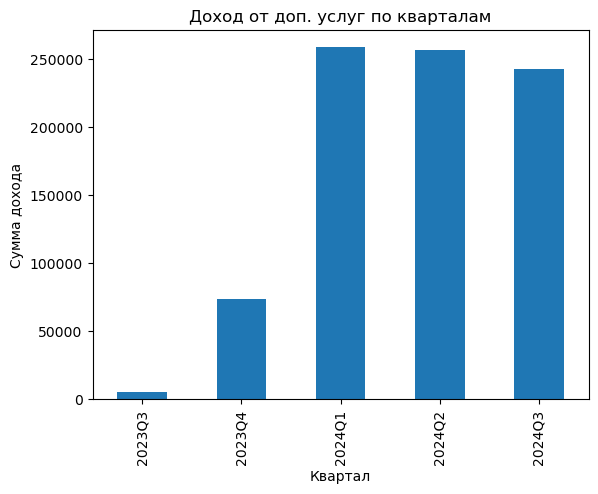

In [38]:
# Доход по доп.услугам по кварталам
group_quarter.plot(
    kind='bar',                     
    title='Доход от доп. услуг по кварталам', 
    ylabel='Сумма дохода', 
    xlabel='Квартал',
    legend=False
)
plt.show()

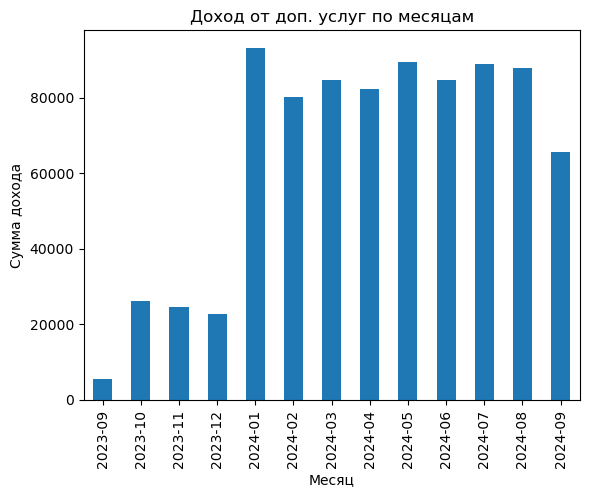

In [39]:
# Доход по доп.услугам по месяцам
group_month.plot(
    kind='bar',                     
    title='Доход от доп. услуг по месяцам', 
    ylabel='Сумма дохода', 
    xlabel='Месяц',
    legend=False
)
plt.show()